------------------
    Outlier treatment
------------------

Extreme values are outliers, box plot can be used to detect outliers

In [2]:
salary = [11,40,45,68,65,68,78,90,57,74,91,92,88,68,57,48,99,101,68,77,110,140]

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
# five point summary
np.quantile(salary,[0,.25,.50,.75,1])

array([ 11.  ,  59.  ,  71.  ,  90.75, 140.  ])

In [6]:
df = pd.DataFrame(salary,columns=['salary'])

In [7]:
# five point summary via pandas
df.describe()

,salary
count,22.000000
mean,74.318182
std,27.201867
min,11.000000
25%,59.000000
50%,71.000000
75%,90.750000
max,140.000000


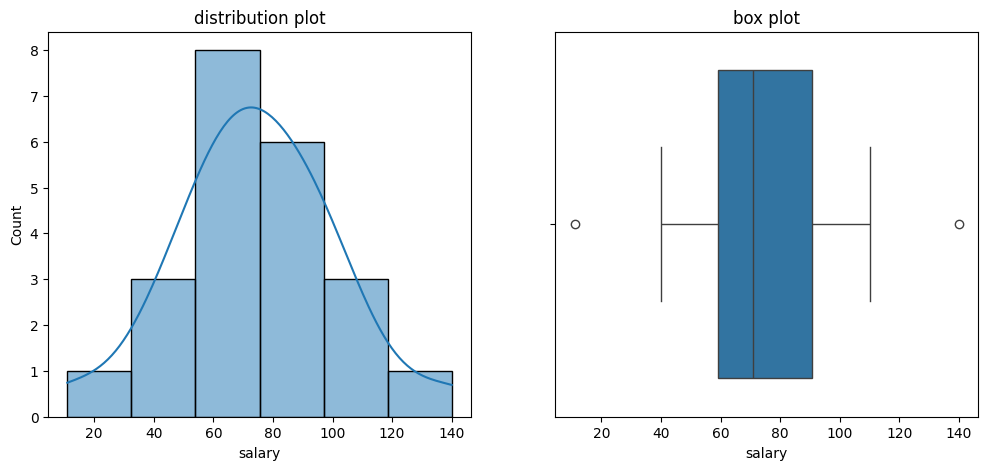

In [11]:
# to chk outliers >> distribution and box plot

plt.figure(figsize=(12,5))
plt.subplot(1,2,1) # 1st plot
sns.histplot(df.salary, kde = True)
plt.title("distribution plot")

plt.subplot(1,2,2) # second plot
sns.boxplot(data=df, x='salary')
plt.title("box plot")

plt.show()

    treatment of outliers
        dropping the outlier
        capping the outlier
        replace with mean and median
        scaling and transformation

In [ ]:
# replace with mean and median
# scaling and transformation

In [13]:
# calculate outlier

Q1 = df['salary'].quantile(.25)
Q3 = df['salary'].quantile(.75)
IQR = Q3-Q1

In [15]:
lower_fence = Q1-1.5*IQR
upper_fence = Q3+1.5*IQR

In [16]:
lower_fence

11.375

In [17]:
upper_fence

138.375

In [18]:
df.shape

(22, 1)

In [20]:
# treatment with dropping the outlier
df_filtered = df[(df.salary >= lower_fence) & (df.salary<= upper_fence)] # keep the data from the data frame greater then Lower fence and lower than upper fence

In [21]:
df_filtered.shape

(20, 1)

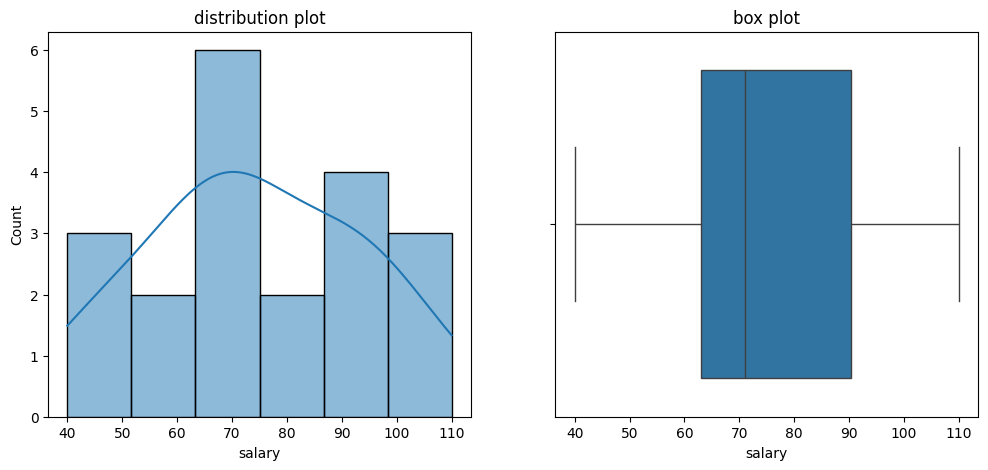

In [22]:
# re plotting to but not required
plt.figure(figsize=(12,5))
plt.subplot(1,2,1) # 1st plot
sns.histplot(df_filtered.salary, kde = True)
plt.title("distribution plot")

plt.subplot(1,2,2) # second plot
sns.boxplot(data=df_filtered, x='salary')
plt.title("box plot")

plt.show()

In [24]:
# replace the outliers with mean and median
df['salary_mean_imputed']=np.where((df.salary>= upper_fence) | (df.salary<=lower_fence),df.salary.mean(),df.salary)

In [25]:
df

,salary,salary_mean_imputed
0,11,74.318182
1,40,40.000000
2,45,45.000000
3,68,68.000000
4,65,65.000000
5,68,68.000000
6,78,78.000000
7,90,90.000000
8,57,57.000000
9,74,74.000000


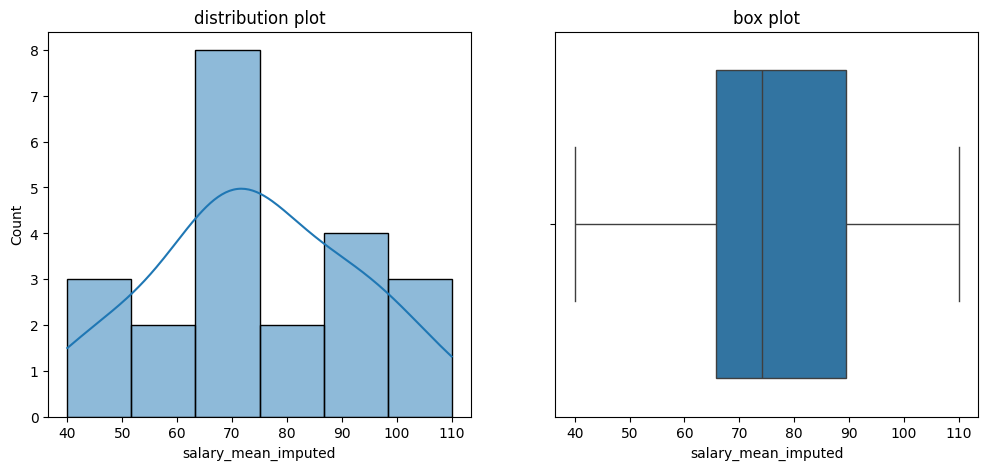

In [26]:
# re plotting to but not required
plt.figure(figsize=(12,5))
plt.subplot(1,2,1) # 1st plot
sns.histplot(df.salary_mean_imputed, kde = True)
plt.title("distribution plot")

plt.subplot(1,2,2) # second plot
sns.boxplot(data=df, x='salary_mean_imputed')
plt.title("box plot")

plt.show()

In [27]:
# capping of outliers >> replacing outliers with the nearest value that is not outlier

In [29]:
lower_cap = df.salary.quantile(.05) # lower cap as 5th percentile
upper_cap = df.salary.quantile(.95) # lower cap as 95th percentile


In [30]:
lower_cap

40.25

In [31]:
upper_cap

109.55

In [32]:
df['salary_cap'] = np.where(df.salary<lower_cap,lower_cap,np.where(df.salary>upper_cap,upper_cap,df.salary))

In [33]:
df

,salary,salary_mean_imputed,salary_cap
0,11,74.318182,40.25
1,40,40.000000,40.25
2,45,45.000000,45.00
3,68,68.000000,68.00
4,65,65.000000,65.00
5,68,68.000000,68.00
6,78,78.000000,78.00
7,90,90.000000,90.00
8,57,57.000000,57.00
9,74,74.000000,74.00


In [38]:
temp = np.where(df.salary<lower_cap,lower_cap,df.salary)

df['salary_cap_new'] = np.where(temp>upper_cap,upper_cap,temp)

In [39]:
df

,salary,salary_mean_imputed,salary_cap,salary_cap_new
0,11,74.318182,40.25,40.25
1,40,40.000000,40.25,40.25
2,45,45.000000,45.00,45.00
3,68,68.000000,68.00,68.00
4,65,65.000000,65.00,65.00
5,68,68.000000,68.00,68.00
6,78,78.000000,78.00,78.00
7,90,90.000000,90.00,90.00
8,57,57.000000,57.00,57.00
9,74,74.000000,74.00,74.00
